<a href="https://colab.research.google.com/github/anastasiablokhina/Data_Visualization_with_Python_and_R/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуальный анализ

*Все задания выполняются только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`, `plotly`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных композиций.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

> **NB!** *Для выполнения задания возьмите 30 тысяч случайных строк из датасета.*

# Часть 1

## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 28.8 MB 1.9 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
music_genre = pd.read_csv('/content/music_genre.csv.zip', index_col='instance_id', na_values = ['?', 'empty_field'])
df_sample = music_genre.sample(30000)
df = df_sample[df_sample['duration_ms'] > 0]

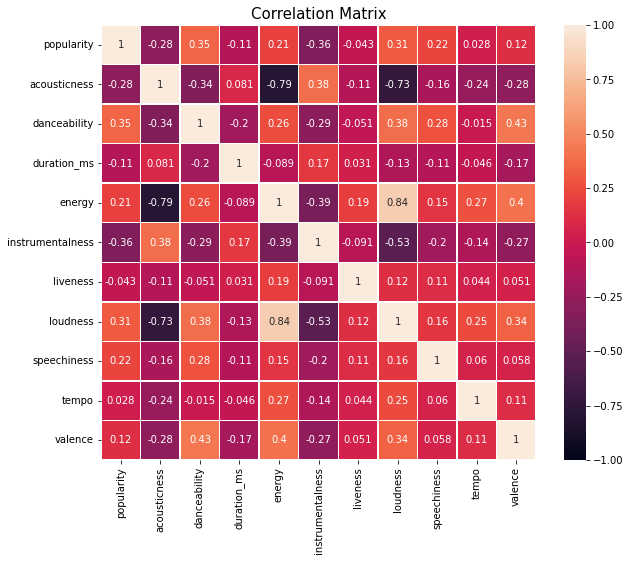

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15)
plt.show()

**Вывод**: Акустические треки чаще всего неэнергичные и негромкие, в то время как энергичным трекам присуща громкость.

## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

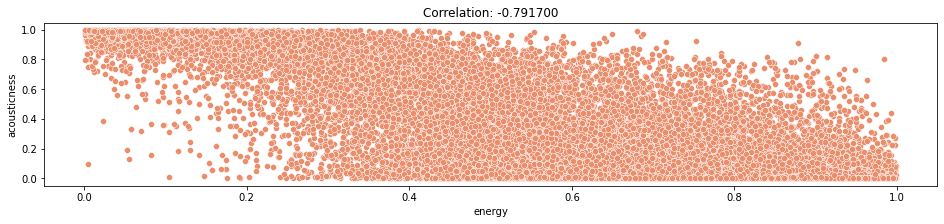

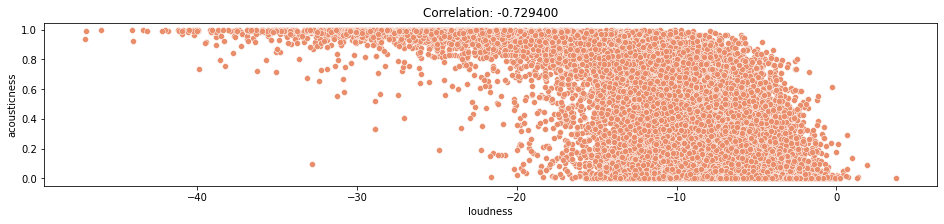

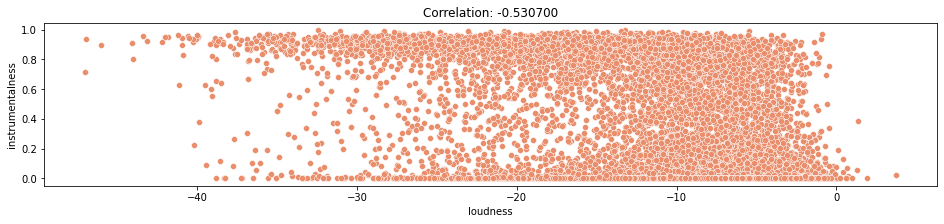

In [ ]:
sns.set_palette('flare')
df_corr = df.corr().unstack().reset_index()
high_corr_features = df_corr[(df_corr['level_0'] != df_corr['level_1']) & (df_corr[0] < 0)].sort_values(by=0).drop_duplicates(subset=0).head(3).reset_index().drop(columns = ['index'],axis = 1)
for i in range(3):
  plt.figure(figsize=(16,3))
  sns.scatterplot(data=df, x=high_corr_features.at[i,'level_0'], y=high_corr_features.at[i,'level_1'])
  plt.title('Correlation: %f' % round(high_corr_features.at[i,0], 4))
  plt.show()


**Вывод:** Между энергичностью и акустичностью, громкостью и акустичностью наблюдается высокая отрицательная корреляция, между громкостью и инструментальностью - средняя.

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

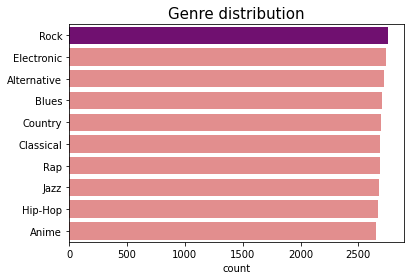

In [ ]:
df_genre = pd.DataFrame(df['music_genre'].value_counts())
idx = df_genre.index.values
values = df_genre.music_genre.values
clrs = ['lightcoral' if (x < max(values)) else 'purple' for x in values ]
sns.barplot(y=idx, x=values, palette=clrs)
plt.xlabel("count")
plt.title('Genre distribution', size=15)
plt.show()

**Вывод:** Среди жанров доминирует рок.

## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

In [ ]:
top_genre = df_genre.head(3).index.values
#ищем по 3 самых популярных исполнителя в жанре
top_0 = pd.DataFrame(df.set_index('music_genre').loc[top_genre[0]].reset_index()[['music_genre', 'artist_name']].value_counts()).head(3)
top_1 = pd.DataFrame(df.set_index('music_genre').loc[top_genre[1]].reset_index()[['music_genre', 'artist_name']].value_counts()).head(3)
top_2 = pd.DataFrame(df.set_index('music_genre').loc[top_genre[2]].reset_index()[['music_genre', 'artist_name']].value_counts()).head(3)
#объединяем
top = top_0.append(top_1).append(top_2).reset_index()
#строим диаграмму
fig = px.sunburst(top, path=['music_genre', 'artist_name'], values=0, title='Top-3 artists in top-3 music genres', width=475, height=475) 
fig.show()

**Вывод:** В жанре рок большая часть треков принадлежит группе The Beatles (38 треков), в жанре электроника - Thievery Corporation (42 трека), в альтернативе - Five Finger Death Punch (31 трек).

## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

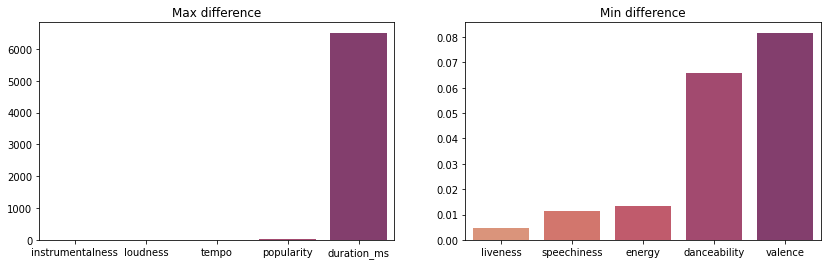

In [ ]:
most_popular = pd.DataFrame(df.set_index('music_genre').loc[df_genre.index.values[0]].mean()).rename(columns={0:'most_popular'})
least_popular = pd.DataFrame(df.set_index('music_genre').loc[df_genre.index.values[-1]].mean()).rename(columns={0:'least_popular'})
df_pop = pd.concat([most_popular, least_popular], axis=1)
df_pop['difference'] = abs(df_pop['most_popular']-df_pop['least_popular'])
df_pop = df_pop.sort_values(by='difference')
top_5, bed_5 = df_pop.tail(5), df_pop.head(5)
idx_0, idx_1 = top_5.index.values, bed_5.index.values
values_0, values_1 = top_5.difference.values, bed_5.difference.values

fig, axis = plt.subplots(1, 2, figsize=(14, 4))
sns.barplot(x=idx_0, y=values_0, ax=axis[0])
sns.barplot(x=idx_1, y=values_1, ax=axis[1])
axis[0].set(title='Max difference')
axis[1].set(title='Min difference')
plt.show()


**Вывод:** Максимальная разница между жанрами аниме и рок достигается в характеристике "длительность", минимальная - в характеристике "живость".

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

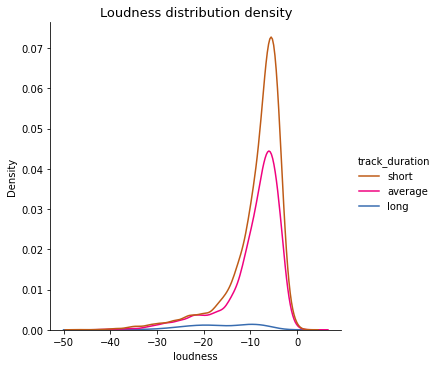

In [ ]:
sns.set_palette('Accent_r')
df_new = df.copy()
df_new['track_duration'] = df_new['duration_ms'].map(lambda x: 'short' if x<240000 else ('average' if x<480000 else 'long'))
sns.displot(df_new, x='loudness', hue='track_duration', kind="kde")
plt.title('Loudness distribution density', size=13)
plt.show()

## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

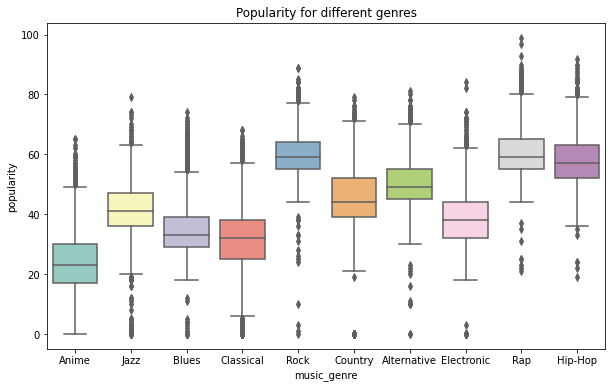

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x='music_genre', y='popularity', data=df, palette="Set3")
plt.title('Popularity for different genres', size=12)
plt.show()

**Вывод:** При сопоставлении медианной популярности различных жанров музыки, можно увидеть сходство между:
*   классической музыкой и блюзом
*   рэпом, роком и хип-хоп музыкой



## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

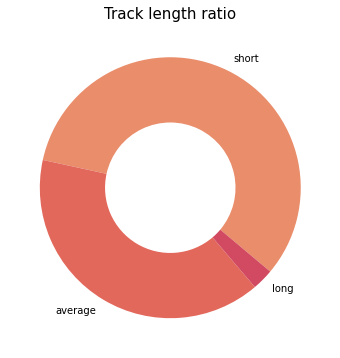

In [ ]:
sns.set_palette('flare')
plt.figure(figsize = (6,6))
donut_df = pd.DataFrame(df_new['track_duration'].value_counts()).reset_index().rename(columns={'index':'track_duration', 'track_duration':'count'})
fig = plt.pie(x=donut_df['count'].values, labels=donut_df['track_duration'].values, wedgeprops=dict(width=0.5), startangle=-40) 
plt.title('Track length ratio', size=15)
plt.show()

**Вывод:** Больше всего коротких треков, меньше всего - длинных.

# Часть 2 (выполнение на R не обязательно)

Для второй части задания будем использовать другой датасет: о распределении Starbucks по всему миру. Датасет возьмем [отсюда](https://www.kaggle.com/starbucks/store-locations).

## Задание 9

Покажите на карте количество кофеен в каждой строне, данные о которой есть в датасете.

In [ ]:
coffee = pd.read_csv('/content/archive.zip')
coffee.rename(columns = {'Country' : 'Code'}, inplace = True)
wrld = pd.read_csv('/content/archive (1).zip')[['name', 'alpha-2', 'region']]
wrld.columns = ['Country', 'Code', 'Region']
cf = pd.merge(coffee, wrld, how='inner')


In [ ]:
rg = pd.DataFrame(cf.groupby('Region')['Country'].value_counts())
rg.columns = ['Number of stores']
rgn = rg.reset_index()
fig = px.choropleth(rgn, locations='Country', locationmode="country names",
                    color='Number of stores', color_continuous_scale="tealrose",
                    scope="world", title='Starbucks Locations Worldwide')
fig.show()

Больше всего кофеен расположено в США.

## Задание 10

Покажите на диаграмме вида treemap количество кофеен в каждой стране каждого региона мира, данные о которых есть в датасете. Страну подписывайте названием, а не ее кодом.

In [ ]:
fig = px.treemap(rgn, path=[px.Constant("World"), 'Region', 'Country'],
                 values='Number of stores',
                 color_continuous_scale='tealrose',
                 color='Number of stores',
                 hover_data=['Number of stores'])
fig.show()

Половина всех кофеен расположена в США.